In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [2]:
accuracies = []
y_pred_probas = []

def predict(year):
    df_past_1 = pd.read_csv(f'./match_data_yearly/{year-1}.csv')
    df_past_2 = pd.read_csv(f'./match_data_yearly/{year-2}.csv')
    df_past_3 = pd.read_csv(f'./match_data_yearly/{year-3}.csv')
    
    df_past = pd.concat([df_past_3,df_past_2,df_past_1])    
    X_train = df_past[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_train = df_past["W/L"].values
    
    df_future = pd.read_csv(f'./match_data_yearly/{year}.csv')
    X_test = df_future[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_test = df_future["W/L"].values
    
    rf= RandomForestClassifier(max_depth=5)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    y_pred_proba=rf.predict_proba(X_test)
    y_pred_probas.append(y_pred_proba) 
   
    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy)
    
    print(len(df_future[df_future["W/L"]==0]),len(df_future[df_future["W/L"]==1]),len(df_future[df_future["W/L"]==2]))
    print(np.sum(y_pred_proba, axis=0))

In [3]:
for _ in range(10):
    for y in (2013,2014,2015,2016,2017,2018,2019,2020):
        predict(y)

68 142 96
[ 76.33181564 128.33512926 101.3330551 ]
77 125 104
[ 72.64743343 129.38425627 103.9683103 ]
75 118 113
[ 77.66221073 123.11371404 105.22407523]
70 117 119
[ 73.85954333 118.92680978 113.21364689]
73 126 107
[ 76.52911111 120.97378683 108.49710206]
69 128 109
[ 76.2078763  119.38026059 110.41186311]
72 128 106
[ 70.83124619 123.3841262  111.78462761]
68 118 120
[ 73.52442968 127.23183451 105.24373581]
68 142 96
[ 77.07636996 127.96589585 100.95773419]
77 125 104
[ 72.57661968 129.93346001 103.48992031]
75 118 113
[ 76.83830081 122.7074588  106.45424039]
70 117 119
[ 74.12220066 118.46289708 113.41490226]
73 126 107
[ 74.17131409 121.12898207 110.69970384]
69 128 109
[ 75.79394519 120.29565801 109.91039679]
72 128 106
[ 70.96182615 122.71348413 112.32468972]
68 118 120
[ 72.52361291 128.83468289 104.6417042 ]
68 142 96
[ 76.42132156 127.39821747 102.18046097]
77 125 104
[ 70.88255106 130.64685753 104.47059141]
75 118 113
[ 77.06107161 122.90534292 106.03358547]
70 117 119
[ 75

In [4]:
accuracies

[0.6568627450980392,
 0.6274509803921569,
 0.6045751633986928,
 0.6666666666666666,
 0.6503267973856209,
 0.6241830065359477,
 0.6470588235294118,
 0.6013071895424836,
 0.6699346405228758,
 0.6274509803921569,
 0.6045751633986928,
 0.673202614379085,
 0.6535947712418301,
 0.6176470588235294,
 0.6470588235294118,
 0.6045751633986928,
 0.6764705882352942,
 0.6209150326797386,
 0.5947712418300654,
 0.6633986928104575,
 0.6568627450980392,
 0.6143790849673203,
 0.6437908496732027,
 0.6078431372549019,
 0.6633986928104575,
 0.6274509803921569,
 0.6078431372549019,
 0.6633986928104575,
 0.6470588235294118,
 0.6045751633986928,
 0.6176470588235294,
 0.6045751633986928,
 0.6568627450980392,
 0.6176470588235294,
 0.6111111111111112,
 0.6764705882352942,
 0.6535947712418301,
 0.6143790849673203,
 0.6372549019607843,
 0.5980392156862745,
 0.6666666666666666,
 0.6274509803921569,
 0.6078431372549019,
 0.6666666666666666,
 0.6633986928104575,
 0.6176470588235294,
 0.6470588235294118,
 0.58496732026

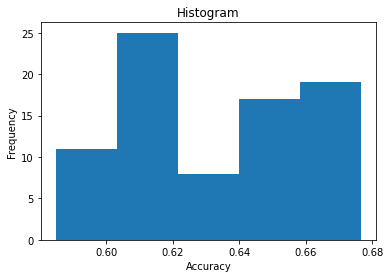

In [5]:
n, bins, patches=plt.hist(accuracies, bins=5)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [6]:
np.mean(accuracies)

0.6330473856209149

### 考察

2013-2020を予測するシーズンとし､そのシーズンの過去3年間を訓練データとした｡
試合時のEloratingと前月との差分を入力データに使い､勝敗予測の精度を出したところ､2013-2020でおよそ60%台前半にぐらいになる